In [104]:
import os, sys

# Get the absolute path of the notebook's directory
notebook_dir = os.getcwd()

# Navigate to the parent directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, ".."))

# Add the parent directory to sys.path so we can import modules
sys.path.append(parent_dir)

# Verify the path
print(f"Added to sys.path: {parent_dir}")

# Add it to sys.path
sys.path.append(parent_dir)

print(parent_dir)
from localityaware.module import *
from NSGA_nn.nsga import *
from FlashOperation.Refrig2DrumHeatExConstrDummy import Refrig2DrumConstraintHeatExConstDummy

Added to sys.path: /Users/panwapromtep/Desktop/Aspen
/Users/panwapromtep/Desktop/Aspen


In [111]:
import pickle
import torch

run_id = 'run_2025-04-11_18-12-21'

# Open out.pkl from the specified run_id
with open(f'./results/{run_id}/out.pkl', 'rb') as file:
    out = pickle.load(file)
print(out.keys())
y_path = out['y_path']
x_path = out['x_path']
assSim_call_count = out['assSim_call_count']
iteration_log = out['iteration_log']
populations = out['populations']
data_gen_time = out['data_gen_time']
total_original_assSim_calls = out['total_original_assSim_calls']

# Open scaler.pkl from the specified run_id
with open(f'./results/{run_id}/scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the model from the specified run_id
model = out['model']
model.eval()

dataset = out['dataset']
print("data_gen_time", data_gen_time)

dict_keys(['model', 'x_path', 'y_path', 'dataset', 'assSim_call_count', 'populations', 'iteration_log', 'data_gen_time', 'total_original_assSim_calls'])
data_gen_time 0.0009992122650146484


In [112]:
print(iteration_log)

[{'iteration': 0, 'time_sec': 1.2026638984680176, 'assSim_calls': 1, 'x': array([14.972073,  9.369928], dtype=float32), 'y': 311.9585154504057}, {'iteration': 1, 'time_sec': 0.327455997467041, 'assSim_calls': 7, 'x': array([ 3.7645721, -6.616046 ], dtype=float32), 'y': 57.944067460929546}, {'iteration': 2, 'time_sec': 0.37877702713012695, 'assSim_calls': 13, 'x': array([ 2.8542633, -7.1831274], dtype=float32), 'y': 59.74413830951471}, {'iteration': 3, 'time_sec': 0.34767937660217285, 'assSim_calls': 19, 'x': array([ 4.4254723, -7.4222713], dtype=float32), 'y': 74.67491525328683}, {'iteration': 4, 'time_sec': 0.347963809967041, 'assSim_calls': 25, 'x': array([ 5.080845, -9.573671], dtype=float32), 'y': 117.47016763037027}, {'iteration': 5, 'time_sec': 0.3729088306427002, 'assSim_calls': 31, 'x': array([ 3.1774883, -8.504967 ], dtype=float32), 'y': 82.43089124613107}, {'iteration': 6, 'time_sec': 0.3801229000091553, 'assSim_calls': 37, 'x': array([-2.8567753, -1.6481409], dtype=float32),

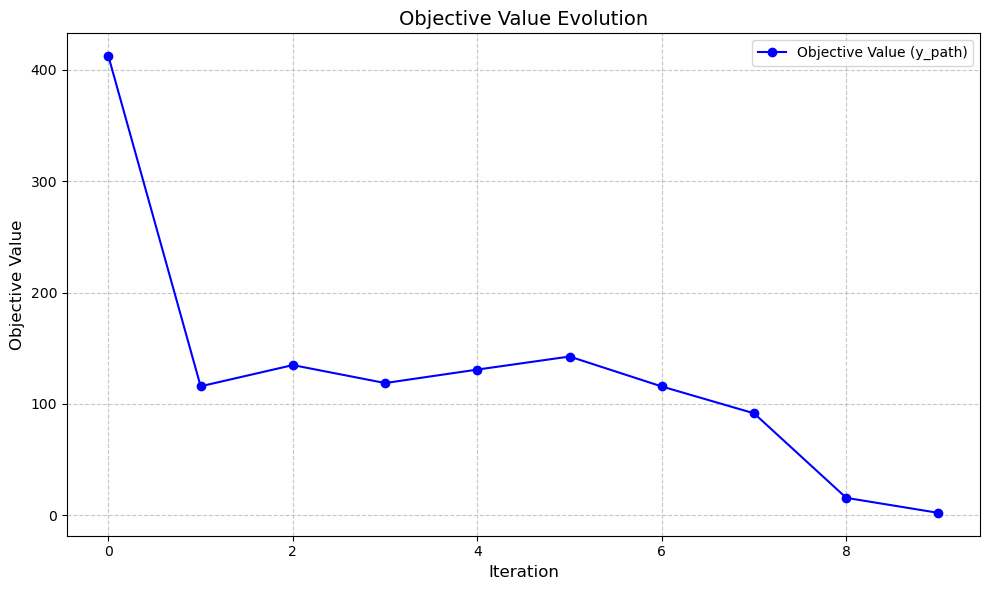

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(out['y_path'], marker='o', label='Objective Value (y_path)', color='blue')
plt.title('Objective Value Evolution', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Objective Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

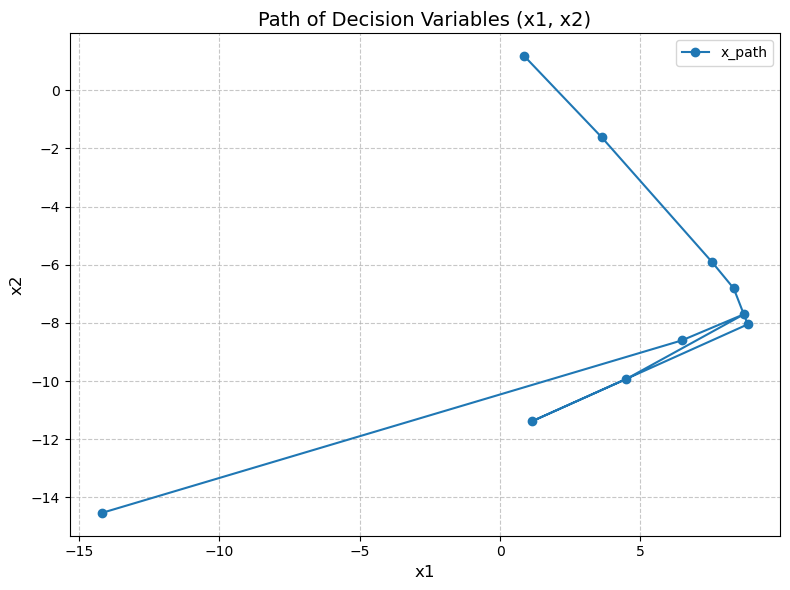

In [ ]:
# Plot x_path for x1 and x2
x_path_array = np.array(x_path)  # Convert the list of arrays to a NumPy array
plt.figure(figsize=(8, 6))
plt.plot(x_path_array[:, 0], x_path_array[:, 1], marker='o', label='x_path')
plt.title('Path of Decision Variables (x1, x2)', fontsize=14)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

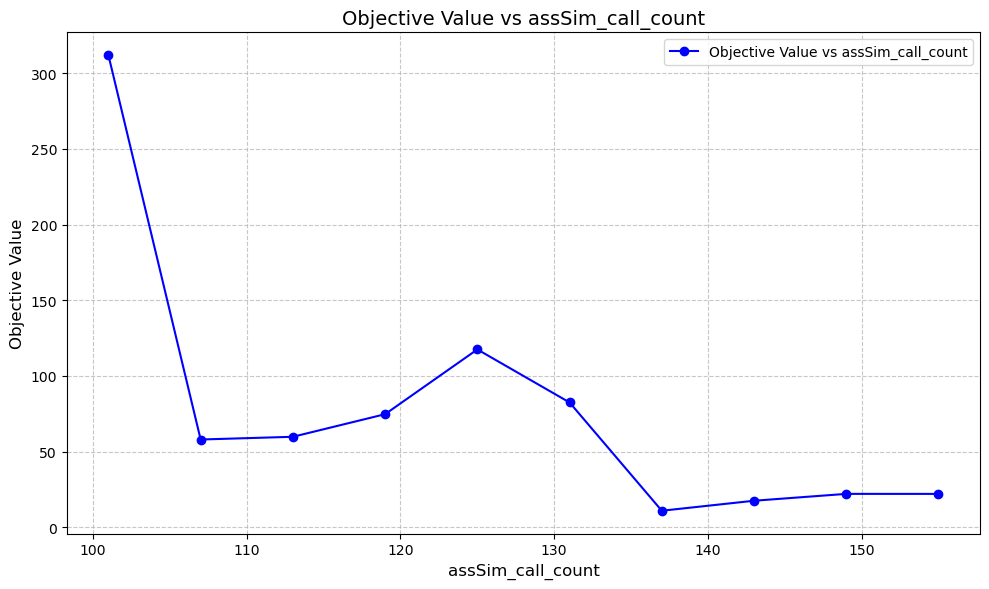

In [107]:
# Extract the number of calls and corresponding objective values
# add total_orginal_assSim_calls to each assSim_calls
assSim_calls = [log['assSim_calls'] + total_original_assSim_calls for log in iteration_log]
objective_values = y_path

# Plot
plt.figure(figsize=(10, 6))
plt.plot(assSim_calls, objective_values, marker='o', color='blue', label='Objective Value vs assSim_call_count')
plt.title('Objective Value vs assSim_call_count', fontsize=14)
plt.xlabel('assSim_call_count', fontsize=12)
plt.ylabel('Objective Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


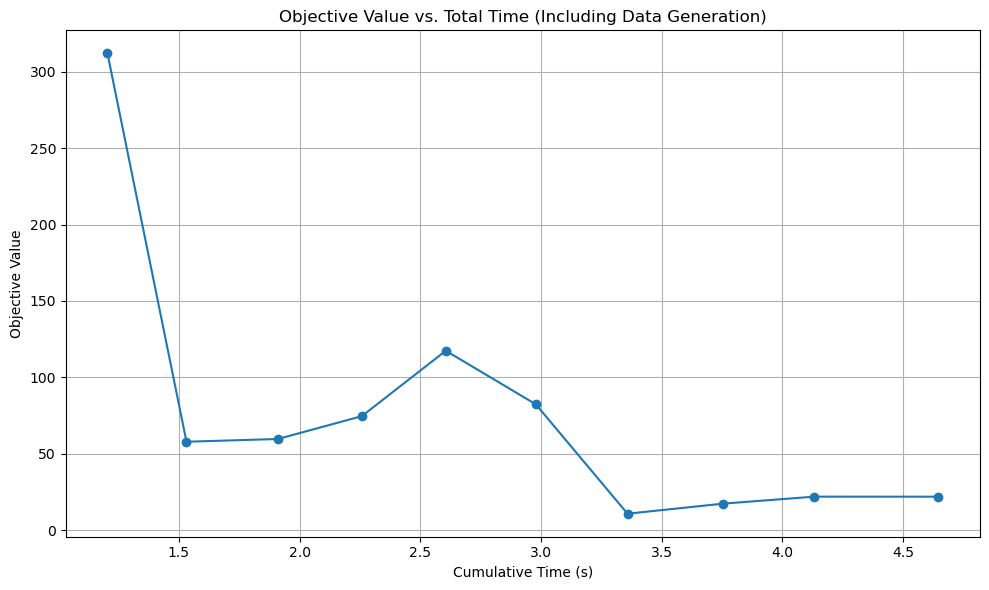

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Extract values from log
objectives = [log["y"] for log in iteration_log]
iteration_times = [log["time_sec"] for log in iteration_log]

# Get data generation time
data_gen_time = out.get("data_gen_time", 0.0)

# Compute cumulative time points (offset by data_gen_time)
cumulative_times = list(np.cumsum(iteration_times) + data_gen_time)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_times, objectives, marker='o', linestyle='-')
plt.xlabel("Cumulative Time (s)")
plt.ylabel("Objective Value")
plt.title("Objective Value vs. Total Time (Including Data Generation)")
plt.grid(True)
plt.tight_layout()
plt.show()


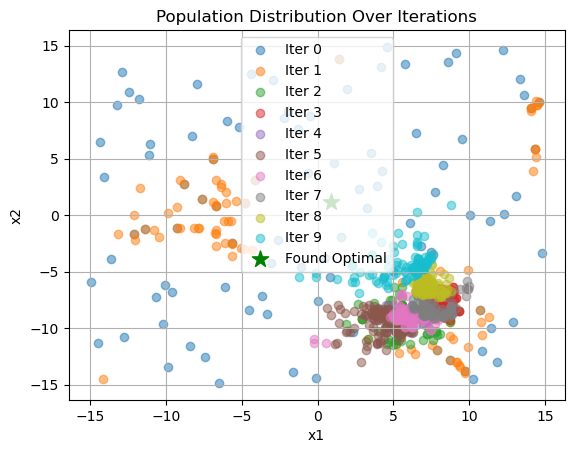

In [ ]:
import matplotlib.pyplot as plt

def plot_population_evolution(all_pops, min, scaler):
    for i, pop in enumerate(all_pops):
        # Inverse transform the scaled population
        pop = scaler.inverse_transform(pop)
        # Extract x1 and x2 coordinates
        x = pop[:, 0]
        y = pop[:, 1]
        plt.scatter(x, y, alpha=0.5, label=f'Iter {i}')
    
    plt.title("Population Distribution Over Iterations")
    plt.xlabel("x1")
    plt.ylabel("x2")
    if min is not None:
        # Inverse transform the scaled minimum point
        min = scaler.inverse_transform(min)
        plt.scatter(min[0], min[1], color='red', marker='*', s=150, label='True Optimal')
    #plot the minimum point found by the model
    plt.scatter(out['x_path'][-1][0], out['x_path'][-1][1], color='green', marker='*', s=150, label='Found Optimal')
    

    plt.legend()
    plt.grid(True)
    plt.show()

plot_population_evolution(populations, None, scaler)


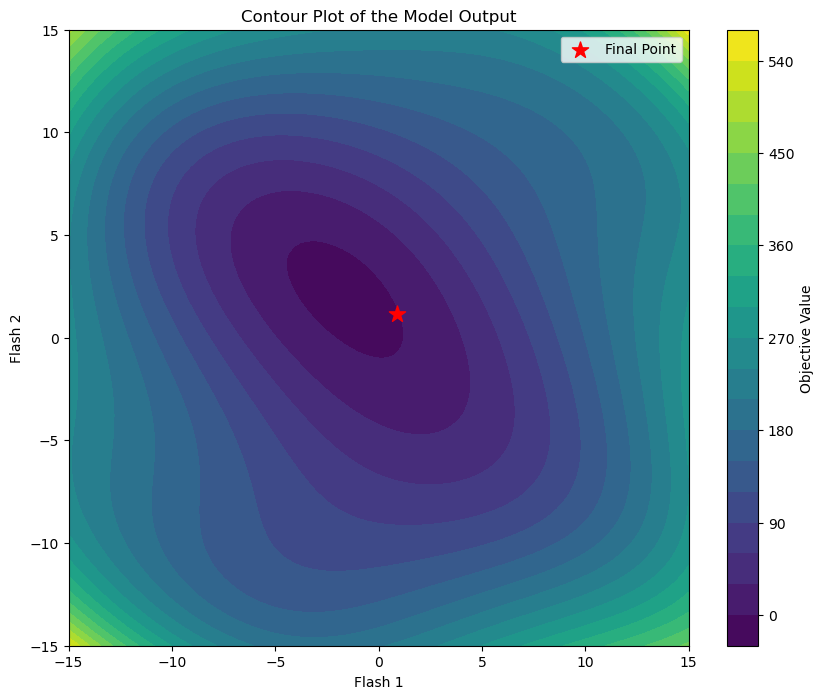

In [ ]:
#plot contour surface of the model
x = scaler.inverse_transform(np.linspace(-1, 1, 100).reshape(-1, 1)).flatten()
y = scaler.inverse_transform(np.linspace(-1, 1, 100).reshape(-1, 1)).flatten()
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        input_tensor = torch.tensor([X[i, j], Y[i, j]], dtype=torch.float32)
        input_tensor_scaled = scaler.transform(input_tensor)
        output_scaled = model(input_tensor_scaled)
        input, output = scaler.inverse_transform(input_tensor_scaled, output_scaled)
        Z[i, j] = output.item()
#log transform Z
# Z = np.log(Z + 1e-10)  # Adding a small constant to avoid log(0)
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(label='Objective Value')
plt.title('Contour Plot of the Model Output')
plt.xlabel('Flash 1')
plt.ylabel('Flash 2')
plt.scatter(out['x_path'][-1][0], out['x_path'][-1][1], color='red', marker='*', s=150, label='Final Point')

plt.legend()
plt.show()

In [ ]:
print(dataset)

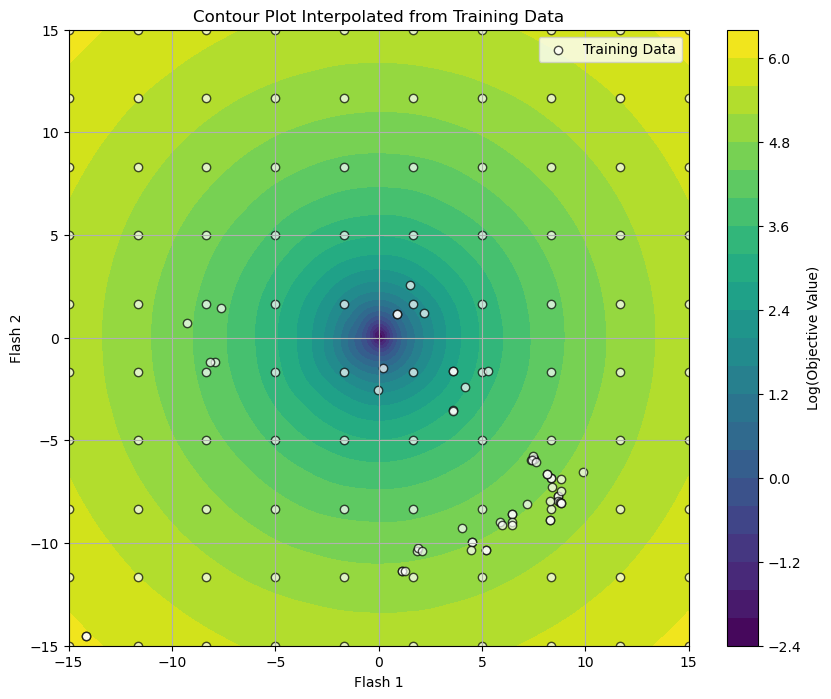

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Extract and inverse-transform dataset (if it's scaled)
X_scaled = dataset.data[:, :2]
Y_scaled = dataset.data[:, 2:]
X_unscaled, Y_unscaled = scaler.inverse_transform(X_scaled, Y_scaled)

# Flatten
x1 = X_unscaled[:, 0]
x2 = X_unscaled[:, 1]
y = Y_unscaled.flatten()

# Create a grid to interpolate over
grid_x, grid_y = np.meshgrid(
    np.linspace(x1.min(), x1.max(), 200),
    np.linspace(x2.min(), x2.max(), 200)
)

# Interpolate using griddata
grid_z = griddata((x1, x2), y, (grid_x, grid_y), method='cubic')

# Optional: log transform
grid_z = np.log(grid_z + 1e-10)

# Plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap='viridis')
plt.colorbar(contour, label='Log(Objective Value)')
plt.xlabel('Flash 1')
plt.ylabel('Flash 2')
plt.title('Contour Plot Interpolated from Training Data')
plt.scatter(x1, x2, color='white', edgecolor='black', label='Training Data', alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()
